<a href="https://colab.research.google.com/github/Remon128/Arabic_Dialect_Sentiment_Analysis/blob/main/models_Training_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as np
import scipy  as sc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import pickle

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# reading Preprocced data
df_preprocced = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/dialect_dataset_v_prep.csv", index_col=[0])
df_preprocced.shape

(458197, 3)

In [ ]:
df_preprocced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Id       458197 non-null  int64 
 1   Text     458158 non-null  object
 2   Dialect  458197 non-null  object
dtypes: int64(1), object(2)
memory usage: 14.0+ MB


In [ ]:
# Dropping Rows with Null Values
df_preprocced = df_preprocced.dropna()
df_preprocced.isnull().sum()

Id         0
Text       0
Dialect    0
dtype: int64

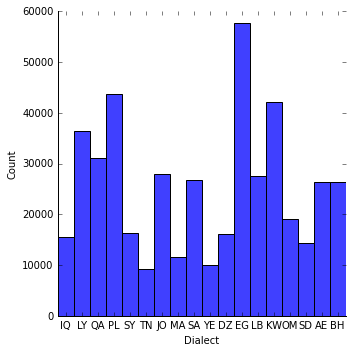

In [ ]:
# Plotting Dialects Countries Frequencies
sns.displot(df_preprocced["Dialect"])

# Conclusion:  Seems that EG, PL, KW are the most Frequencies in Dialects respectively

In [ ]:
df_preprocced.sample(5)

,Id,Text,Dialect
374152,1165241639297855488,[مستخدم] هي +ه دقي +ه بلوك اه +ا تحذر +ي جايتن...,OM
114315,1172966580600414208,[مستخدم] حيدخل ال+ جن +ة ع طول لان +ه رب +نا ا...,PL
391006,872275417729814528,[مستخدم] [مستخدم] م جاي تشوفني ال+ سن +ة ال+ ج...,OM
402814,1176242608710082560,[مستخدم] [مستخدم] كان حصل +ت عليهو حرمم ألبس ز...,SD
435276,1167494169172090880,[مستخدم] [مستخدم] [مستخدم] [مستخدم] [مستخدم] [...,BH


In [ ]:
!pip3 install --upgrade gensim

In [ ]:
#Splitting Data
X_data, y_data = np.array(df_preprocced['Text']), np.array(df_preprocced['Dialect'])

In [ ]:
from gensim.models import word2vec
Embedding_dimensions = 100

# Creating Word2Vec training dataset.
toknized_data = list(map(lambda x: x.split(), X_data))
len(toknized_data)

458158

In [ ]:
# Defining the model and training it.
word2vec_model = word2vec.Word2Vec(toknized_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=1)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 247165


In [ ]:
word2vec_model.wv.most_similar('قول')

[('تقول', 0.6168926954269409),
 ('جاوب', 0.5942986607551575),
 ('قال', 0.590566873550415),
 ('يقول', 0.5865262150764465),
 ('قولو', 0.5648660063743591),
 ('أقول', 0.5616621971130371),
 ('عصب', 0.5552271604537964),
 ('اسكت', 0.5547963976860046),
 ('رد', 0.554765522480011),
 ('بقول', 0.5546392202377319)]

In [ ]:
#saving word2Vec.wv model
word2vec_model.wv.save("/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/word2vec_twitter_Model")

In [ ]:
# Prepare word2vec data set Features

def get_wordVec_Mean(tokens, size):
  count = 0
  vec = np.zeros(size).reshape((1,size))
  for word in tokens:
    try:
      vec += word2vec_model.wv[word].reshape((1,size))
      count += 1
    except KeyError:
      continue
  if count != 0:
    vec = vec/(count)
  return vec

In [ ]:
# Creating word2vec Features
wordVecs_arrays = np.zeros((len(toknized_data),100))
for i in range(len(toknized_data)):
  wordVecs_arrays[i:] = get_wordVec_Mean(toknized_data[i], 100)
  print(i)
wordvec_df = pd.DataFrame(wordVecs_arrays)
wordvec_df.shape

In [ ]:
wordvec_df = pd.DataFrame(wordVecs_arrays)
wordvec_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.851612,-0.318645,0.226765,0.506503,0.208673,-0.399793,1.330134,0.508803,0.022601,0.468337,...,0.056570,0.344765,0.736659,0.703503,0.356437,-0.495538,0.771770,-0.364706,-0.090529,0.333020
1,-0.111766,0.069446,0.118055,0.238998,0.293668,-0.623852,0.786953,0.065605,0.496566,0.012470,...,0.150807,0.134137,0.989734,0.663275,0.338228,0.028847,0.490920,-0.204406,0.003902,0.361514
2,-0.998933,1.252147,0.526375,0.063546,0.711073,-0.338067,1.110335,0.548993,0.141634,0.225931,...,0.373692,0.334257,0.291336,1.209944,0.189676,0.770922,0.347525,-0.446799,-0.469473,-0.083744
3,-1.042964,1.064216,0.130235,-0.220730,-0.032030,-0.820012,0.786370,-0.009246,0.137009,-0.038668,...,-0.121142,-0.226735,1.422243,-0.486025,0.295095,0.788409,0.153115,0.011336,-0.107902,1.194257
4,-0.948752,0.221547,0.483448,-0.279378,0.036630,0.096993,0.857151,0.104611,0.060606,0.284724,...,0.131373,-0.316200,0.467417,-0.975165,0.722124,1.025946,1.152330,-0.134087,0.666316,0.175676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458153,-0.699008,1.044020,-0.050264,-0.288070,0.426965,-0.613660,0.798531,0.467765,0.676595,-0.308595,...,0.462744,0.358468,1.492252,1.086809,-0.286861,-0.019343,-0.114582,0.622775,-0.053895,0.830893
458154,-0.544767,0.518947,0.208375,-0.168839,0.390042,-1.094819,0.775572,0.186183,0.007631,-0.660316,...,0.171143,0.294273,0.662639,-0.800782,0.398675,0.422326,-0.265336,-0.040833,-0.073757,0.662939
458155,-1.261204,0.577531,0.099258,0.238467,0.425999,-0.849105,0.081346,0.585299,-0.146827,-0.184899,...,0.647812,0.917146,1.865355,0.512459,-0.460892,0.280223,-0.193419,0.238049,-0.220263,0.876362
458156,-0.343621,0.128693,0.338566,0.703098,-0.029085,-0.623713,0.814998,0.018653,0.442091,-0.200167,...,1.149209,0.903564,0.897274,-0.595215,0.359472,0.510533,-0.051083,-0.390993,-0.623021,0.960673


In [ ]:
wordvec_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/dialect_dataset_words2Vec_100F.csv")


In [ ]:
wordvec_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/dialect_dataset_words2Vec_100F.csv", index_col=[0])
wordvec_df.shape

(458158, 100)

In [ ]:
# Scaling Data and Normlization
from sklearn import preprocessing
# Scaling
scaled_Data = preprocessing.StandardScaler().fit_transform(wordvec_df)
scaled_Data = pd.DataFrame(scaled_Data)

#Normlization
normalized_Data = preprocessing.normalize(scaled_Data)
normalized_Data = pd.DataFrame(normalized_Data)

In [ ]:
# Label Encoding for Classes
y_classes,_ = pd.factorize(y_data)
y_classes = pd.DataFrame(y_classes)

In [ ]:
#Splitting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(normalized_Data, y_classes, test_size = 0.25, shuffle=y_classes, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(343618, 100)
(114540, 100)
(343618, 1)
(114540, 1)


# **Machine Learning Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
# Logistic Regression
model = LogisticRegression(max_iter=10000, multi_class='ovr',penalty='l2')
trained_model = model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
trained_model.score(X_train,y_train)

0.3338707518232456

In [ ]:
trained_model.score(X_test,y_test)


0.3340754321634364

In [ ]:
# RandomizedSearchCV Search for SVM
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setting Params
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'degree':[1,2,3,4,5,6,7], 'gamma':('scale','float')}
svc = SVC()
clf = RandomizedSearchCV(svc, parameters, verbose=1)
clf.fit(X_train[0:100000], y_train[0:100000].values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
x = pd.DataFrame.from_dict(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051612,0.001858,0.000000,0.000000,rbf,float,1,8,"{'kernel': 'rbf', 'gamma': 'float', 'degree': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,190.447674,13.962916,38.826248,0.681723,linear,scale,3,5,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",0.3299,0.3405,0.3366,0.3308,0.3279,0.33314,0.004681,4
2,0.032934,0.000276,0.000000,0.000000,rbf,float,6,4,"{'kernel': 'rbf', 'gamma': 'float', 'degree': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,140.058878,0.672793,38.744985,0.219024,linear,scale,5,2,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",0.3285,0.3410,0.3371,0.3310,0.3279,0.33310,0.005119,5
4,219.051219,0.661376,65.049905,0.073947,rbf,scale,2,1,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': ...",0.3425,0.3540,0.3520,0.3448,0.3495,0.34856,0.004317,1
5,252.176691,0.677678,64.118859,0.118898,rbf,scale,1,3,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': ...",0.3450,0.3484,0.3451,0.3470,0.3512,0.34734,0.002308,2
6,0.034190,0.002278,0.000000,0.000000,rbf,float,2,6,"{'kernel': 'rbf', 'gamma': 'float', 'degree': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
7,0.032684,0.000224,0.000000,0.000000,rbf,float,3,9,"{'kernel': 'rbf', 'gamma': 'float', 'degree': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.032681,0.000175,0.000000,0.000000,rbf,float,5,2,"{'kernel': 'rbf', 'gamma': 'float', 'degree': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,175.718088,0.800469,35.131488,0.346725,linear,scale,1,6,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",0.3300,0.3415,0.3373,0.3315,0.3284,0.33374,0.004907,3


In [ ]:
# C=1 d=3
svm_model = SVC(kernel='rbf', C=2, degree=5, decision_function_shape='ovr', verbose=3)
svm_model.fit(X_train[0:100000],y_train[0:100000].values.ravel())


[LibSVM]

SVC(C=2, degree=5, verbose=3)

In [ ]:
svm_model.score(X_train[0:100000], y_train[0:100000].values.ravel())


0.6554

In [ ]:
svm_model.score(X_test[0:100000], y_test[0:100000].values.ravel())

0.37922

In [ ]:
svm_pred = svm_model.predict(X_test[0:30000])

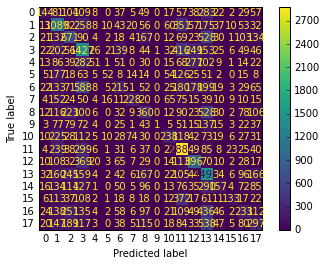

In [ ]:
cm = confusion_matrix(y_test[0:30000], svm_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test[0:30000], svm_pred))

              precision    recall  f1-score   support

           0       0.34      0.23      0.27      1042
           1       0.36      0.49      0.42      2354
           2       0.32      0.37      0.34      2009
           3       0.35      0.48      0.41      2903
           4       0.28      0.11      0.16      1061
           5       0.44      0.17      0.25       637
           6       0.26      0.16      0.20      1793
           7       0.54      0.38      0.45       747
           8       0.26      0.25      0.25      1727
           9       0.28      0.03      0.05       590
          10       0.38      0.27      0.32      1076
          11       0.57      0.76      0.65      3795
          12       0.46      0.52      0.49      1793
          13       0.32      0.49      0.39      2783
          14       0.30      0.17      0.21      1275
          15       0.52      0.24      0.33       956
          16       0.26      0.19      0.22      1723
          17       0.27    

In [ ]:
# saving model 
import joblib
# Save the model as a pickle in a file
joblib.dump(svm_model, '/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/ML_model.pkl')
 
# Load the model from the file
svm_model_joblib = joblib.load('/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/ML_model.pkl')
 
# Use the loaded model to make predictions
#svm_model_joblib.predict(X_test)

## **Deep Learning Modeling**

In [ ]:
# Defining the model input length.
input_length = 200
Embedding_dimensions = 100
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Label Encoding for Classes
from tensorflow.keras.utils import to_categorical
y_classes,_ = pd.factorize(y_data)
y_classes = pd.DataFrame(y_classes)
y = to_categorical(y_classes)

In [ ]:
vocab_length = 247166

tokenizer = Tokenizer(filters="#", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 247166


In [ ]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X_data, y,test_size = 0.25, random_state = 0, stratify=y)

In [ ]:
# Padding and Tokenizing Preprocced Data
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (343618, 200)
X_test.shape : (114540, 200)


In [ ]:
# Embedding Matrix to be Fed for Deep Learning Model
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)


Embedding Matrix Shape: (247166, 100)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [ ]:
# Building Deep Learning Model
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.2, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.2, return_sequences=True)),
        Conv1D(100, 5, activation='tanh'),
        GlobalMaxPool1D(),
        Dense(25, activation='tanh'),
        Dense(25, activation='tanh'),
        Dense(18, activation='softmax'),
    ],
    name="Sentiment_Model")
    return model

In [ ]:
# Model Summary
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          24716600  
                                                                 
 bidirectional (Bidirectiona  (None, 200, 200)         160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 200)         240800    
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 196, 100)          100100    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                   

In [ ]:
# Define CallBacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-7, patience=8)]

In [ ]:
# Model Compile 
training_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Model Training

history = training_model.fit(X_train, y_train, batch_size=512, epochs=80, validation_split=0.1, callbacks=callbacks, verbose=1,)

Epoch 1/80
605/605 [==============================] - 310s 482ms/step - loss: 2.2506 - accuracy: 0.2968 - val_loss: 2.2401 - val_accuracy: 0.3109 - lr: 0.0010
Epoch 2/80
605/605 [==============================] - 292s 483ms/step - loss: 2.0028 - accuracy: 0.3705 - val_loss: 2.0619 - val_accuracy: 0.3573 - lr: 0.0010
Epoch 3/80
605/605 [==============================] - 292s 482ms/step - loss: 1.9008 - accuracy: 0.4011 - val_loss: 1.9346 - val_accuracy: 0.3869 - lr: 0.0010
Epoch 4/80
605/605 [==============================] - 292s 482ms/step - loss: 1.8362 - accuracy: 0.4208 - val_loss: 1.9096 - val_accuracy: 0.4005 - lr: 0.0010
Epoch 5/80
605/605 [==============================] - 293s 484ms/step - loss: 1.7855 - accuracy: 0.4361 - val_loss: 1.8783 - val_accuracy: 0.4101 - lr: 0.0010
Epoch 6/80
605/605 [==============================] - 293s 484ms/step - loss: 1.7454 - accuracy: 0.4487 - val_loss: 1.7857 - val_accuracy: 0.4340 - lr: 0.0010
Epoch 7/80
605/605 [==========================

In [ ]:
# Saving Nodel History
with open('/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/history.pickle', 'wb') as file:
  pickle.dump(history.history, file)

In [ ]:
# Saving Models

# Saving the tokenizer
with open('/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/Tokenizer.pickle', 'wb') as file:
    pickle.dump(tokenizer, file)

# Saving the TF-Model.
training_model.save('/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/Sentiment-BiLSTM')
training_model.save_weights("/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/BiLSTM_Weights/weights")


In [ ]:
# load history
history_file = open('/content/drive/MyDrive/Colab Notebooks/Arabic-Sentence-Ident/history.pickle', 'rb')
loaded_history = pickle.load(history_file)

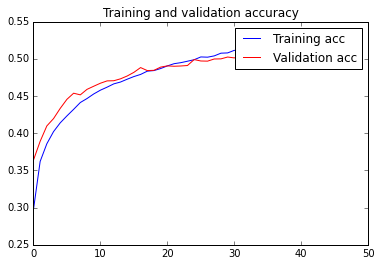

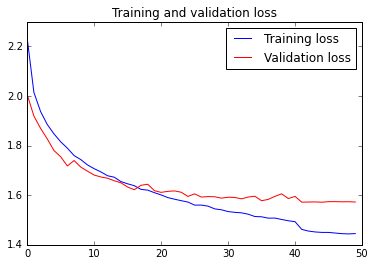

In [ ]:
# Printing Learning Curve (Old Accuracy of 53% Accuracy

acc,  val_acc  = loaded_history['accuracy'], loaded_history['val_accuracy']
loss, val_loss = loaded_history['loss'], loaded_history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()